Structure de bande électronique de NaCaAs :


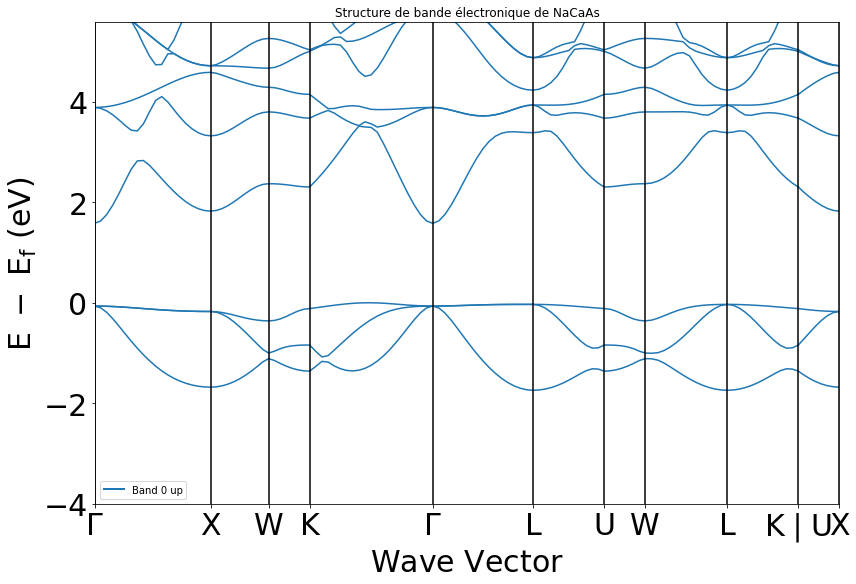

In [150]:
from pymatgen import Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.symmetry.analyzer import SpacegroupOperations
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.core.operations import SymmOp
from pymatgen.electronic_structure.bandstructure import *
from pymatgen.ext.matproj import MPRester
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.electronic_structure.plotter import*
import matplotlib.pyplot as plt
import numpy as np

with MPRester ("v1d7ZHuxlIRyoKmi") as m:
    
    #Création de la structure du cristal à partir du MP
    structure   = m.get_structure_by_material_id("mp-961685")
    
    #Création de la structure de bande du cristal
    struct_band = m.get_bandstructure_by_material_id("mp-961685")
    

#Création d'un objet BSPlotter pour pouvoir afficher le graphe
print("Structure de bande électronique de NaCaAs :")
BS = BSPlotter(struct_band)
BS.get_plot()
plt.title('Structure de bande électronique de NaCaAs')
plt.show()

#Récupération des éléments intéressant de la structure de bande
Elem = BS.bs_plot_data()



# Détermination de la bande interdite

In [151]:
#récupération des informations de la bande interdite
band_gap = struct_band.get_band_gap()
print(band_gap)
print("\n")
if(band_gap['direct'] == False):
    print("La bande d'énergie est indirect \nElle vaut "+str(band_gap['energy'])+" eV \nLa transiton: "+str(band_gap['transition'])+".\n")
    print("Le NaCaAs est donc un semi-conducteur.")
else:
    print("La bande d'énergie est direct \nElle vaut "+str(band_gap['energy'])+" eV \nLa transition: "+str(band_gap['transition'])+".\n")
    print("Le NaCaAs est donc un semi-conducteur.")

{'direct': False, 'energy': 1.5818999999999999, 'transition': '(0.188,0.188,0.375)-\\Gamma'}


La bande d'énergie est indirect 
Elle vaut 1.5818999999999999 eV 
La transiton: (0.188,0.188,0.375)-\Gamma.

Le NaCaAs est donc un semi-conducteur.


#  Détermination de la dernière bande de valence et de la première bande de conduction

In [152]:
#récupération des bandes de conduction maximales
conduction_band_liste = []
conduction_band       = struct_band.get_cbm()

for cursor in conduction_band["band_index"].items():
    conduction_band_liste.append(cursor[1][0])
    
#récuperation de la première bande de conduction
print("La première bande de conduction est la bande, c'est à dire celle contenant l'énergie la plus basse   : "+str(cbmlist[0])+".")




#récupération des bandes de valence maximales
valence_band_liste = []
valence_band = struct_band.get_vbm() 

for cursor in valence_band["band_index"].items():
    valence_band_liste.append(cursor[1][0])
    
#récuperation de la dernière bande de valence
print("La dernière bande de valence est la bande, c'est à dire celle contenant les énergies les plus hautes : "+str(vbmlist[-1])+".")




La première bande de conduction est la bande, c'est à dire celle contenant l'énergie la plus basse   : 11.
La dernière bande de valence est la bande, c'est à dire celle contenant les énergies les plus hautes : 10.


# Détermination de la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion 

La pente maximale de la bande de valence est égal à    0.7685041329077456 (en vert) .
La pente maximale de la bande de conduction est égal à 2.3110509289633683 (en rouge).
La pente minimale de la bande de valence est égal à    0.04302726836214847(en mauve).
La pente minimale de la bande de conduction est égal à 0.2067119279943686 (en noir) .


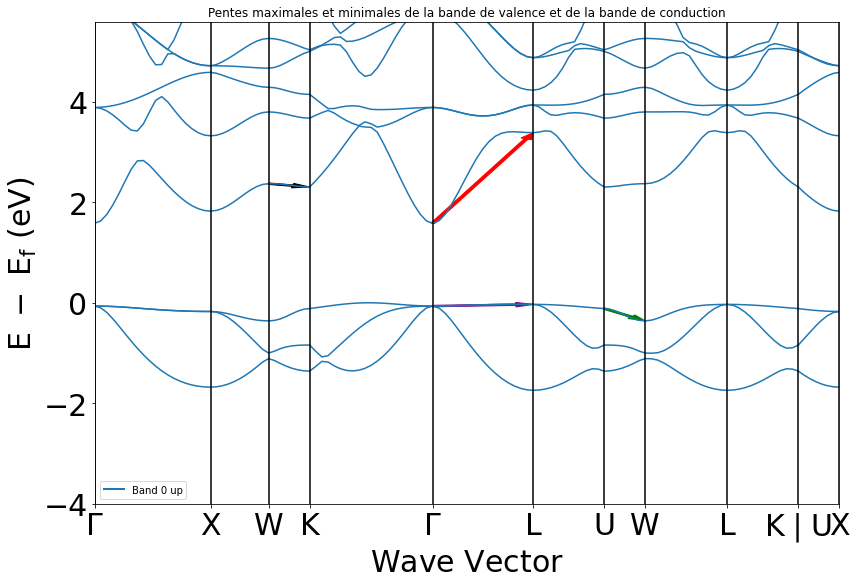

In [153]:
# Recherche de la pente 
def calcul_pente(a,b):
    c = abs(a[-1] - a[0]) /( b[-1] - b[0])
    return np.array([a[-1],a[0],b[-1],b[0],c])

def dispersions (d):
    pente = np.zeros((len(Elem.get('distances')),5))
    p_p    = np.zeros(len(Elem.get('distances')))
    for i in range (len(Elem.get('distances'))):
        pente [i] = calcul_pente((Elem.get('energy'))["1"][i][d],Elem.get('distances')[i])
        
    for j in range (len(Elem.get('distances'))):
        p_p [j] = pente[j][4]
    return [pente,p_p]


maxima_valence    = np.argmax(dispersions(vbmlist[-1])[1])
minima_valence    = np.argmin(dispersions(vbmlist[-1])[1])
maxima_conduction = np.argmax(dispersions(cbmlist[0])[1])
minima_conduction = np.argmin(dispersions(cbmlist[0])[1])


# Recherche des pentes maximales pour la bande de valence et de conduction 
BS.get_plot()
plt.title("Pentes maximales et minimales de la bande de valence et de la bande de conduction")
pente_val_max  = dispersions(vbmlist[-1])[0][maxima_valence]
pente_cond_max = dispersions(cbmlist[0])[0][maxima_conduction]

plt.arrow(pente_val_max[3],pente_val_max[1],pente_val_max[2]-pente_val_max[3],pente_val_max[0]-pente_val_max[1],color='green', width = 0.03,length_includes_head = True)
plt.arrow(pente_cond_max[3],pente_cond_max[1],pente_cond_max[2]-pente_cond_max[3],pente_cond_max[0]-pente_cond_max[1],color = 'red',width =0.03, length_includes_head = True)

# Recherche des pentes minimales pour la bande de valence et de conduction 
pente_val_min  = dispersions(vbmlist[-1])[0][minima_valence]
pente_cond_min = dispersions(cbmlist[0])[0][minima_conduction]

plt.arrow(pente_val_min[3],pente_val_min[1],pente_val_min[2]-pente_val_min[3],pente_val_min[0]-pente_val_min[1],color='purple', width = 0.03,length_includes_head = True)
plt.arrow(pente_cond_min[3],pente_cond_min[1],pente_cond_min[2]-pente_cond_min[3],pente_cond_min[0]-pente_cond_min[1],color = 'black',width =0.03, length_includes_head = True)

print("La pente maximale de la bande de valence est égal à    "+ str(pente_val_max[4])+ " (en vert) .")
print("La pente maximale de la bande de conduction est égal à "+ str(pente_cond_max[4])+ " (en rouge).")
print("La pente minimale de la bande de valence est égal à    "+ str(pente_val_min[4])+ "(en mauve).")
print("La pente minimale de la bande de conduction est égal à "+ str(pente_cond_min[4])+ " (en noir) .")



# Calcul de la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique.

In [154]:
angstrom = 10**(-10)
a        = 4.9271978330537936 #La longueur du vecteur de base du réseau direct a
eV       = 1.602176563*10**(-19)
h_bar    = 6.582119570 * 1e-16 

G = 2*np.pi/a

valence_E    = valence_band['energy']
conduction_E = conduction_band['energy']

masse_effective_valence    = (h_bar**2)*(G**2)/(2*valence_E)
masse_effective_conduction = (h_bar**2)*(G**2)/(2*conduction_E)

print("En supposant une dispersion parabolique,\n")

# Masse effective au sommet de la dernière bande de valence
#masse_effective_valence = (h_barre**2)/(2*abc_v[0]*(angstrom**2)*eV)
print("Masse effective au sommet de la dernière bande de valence (vert)     : ", masse_effective_valence, "kg")

# Masse effective à la base de la première bande de conduction
#masse_effective_conduction = (h_barre**2)/(2*abc_c[0]*(angstrom**2)*eV)
print("Masse effective à la base de la première bande de conduction (rouge) : ", masse_effective_conduction, "kg")

En supposant une dispersion parabolique,

Masse effective au sommet de la dernière bande de valence (vert)     :  3.1712129372499457e-31 kg
Masse effective à la base de la première bande de conduction (rouge) :  1.3081974711988859e-31 kg


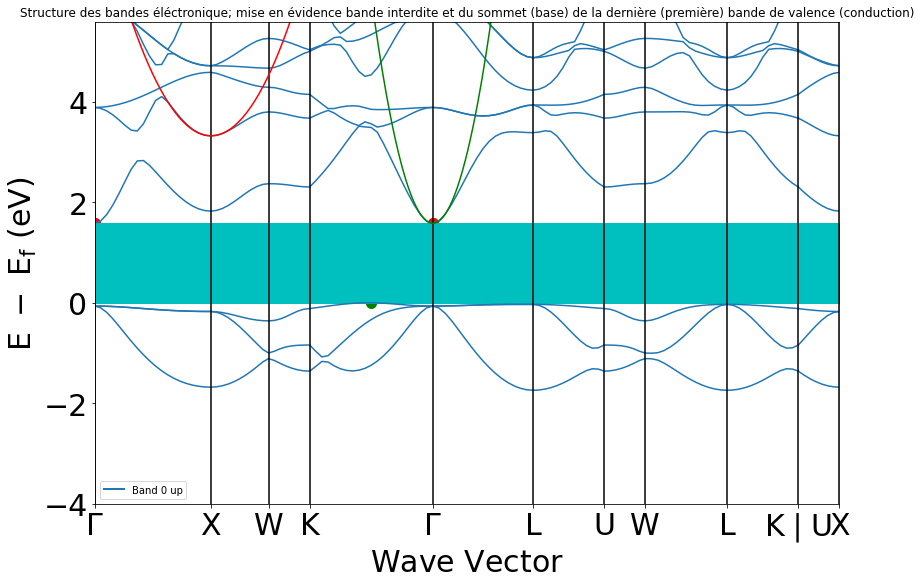

In [155]:
x_plot_c = np.arange(0, 2, 0.01)
y_plot_c = f_c(x_plot_c)


BS.get_plot(vbm_cbm_marker = True)
plt.fill_between(np.linspace(0, BS.bs_plot_data().get("ticks").get("distance")[-1], 500), 0, band_gap.get('energy'), color ='c')
plt.plot(x_plot_v, y_plot_v, color='green')
plt.plot(x_plot_c, y_plot_c, color='red')


plt.title('Structure des bandes éléctronique; mise en évidence bande interdite et du sommet (base) de la dernière (première) bande de valence (conduction)')
plt.show()
